# <center> 数据科学 实验一
何尉宁 2021213599 2021219106班

## 任务列表
**必做：**
- [numpy创建数组，数组形状修改结果截图](#one1)
- [输出波士顿房价数据集的所有属性类型及其样本数量](#one2)
- [数据散点图，自变量DIS（与波士顿中心区距离），因变量房价（学号尾号为基数，散点图为
<font color = "red">红色方形</font>；学号尾号为偶数，散点图为<font color = "blue">蓝色圆形</font>](#one3)
- [线性回归的回归结果折线图及散点图展示](#one4)
- [`boston_X_train=np.array(boston_X_train).reshape(-1,1)`句的意义？](#one5)

**基于‘sepal length (cm), sepal width (cm)‘两个维度进行逻辑回归与聚类实验**
- [鸢尾花数据集逻辑回归散点图](#one6)
- [输出逻辑回归系数](#one7)
- [对鸢尾花数据进行K-means聚类，绘制聚类中心为3的聚类结果图（基于`sepal length (cm)`, `sepal width (cm)`两个维度聚类](#one8)

**选做：**
- [基于给出亚洲足球数据集进行聚类，分析中国男足水平（给出运行代码，3D可视化截图)](#two1)
- [分析不同权重对于结果影响；分析有无数据正则化对结果影响:](#two2)
- [Matplotlib使用、聚类数改变……](#two3)


<h2 id = "one1"> 1.1 NumPy创建数组 </h2>

#### 1.1.1 创建数组

In [1]:
import numpy as np

Array = np.array([1,2,3,4,5,6,7,8,9,10])
print(Array)

[ 1  2  3  4  5  6  7  8  9 10]


#### 1.1.2 修改数组形状

In [6]:
# Create an array
CurrentArray = np.arange(12)
print("Current Array:\n", CurrentArray, "\n")
# Reshape the array to 4x3
CurrentArray = CurrentArray.reshape(4, 3)
print("Reshaped Array:\n", CurrentArray, "\n")
# Reshape the array to 12x1
CurrentArray = CurrentArray.reshape(-1, 1)
print("Reshaped Array:\n", CurrentArray, "\n")

Current Array:
 [ 0  1  2  3  4  5  6  7  8  9 10 11] 

Reshaped Array:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

Reshaped Array:
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]] 



<h2 id = "one2"> 1.2 波士顿数据观察 </h2>

In [41]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np
%matplotlib inline

# Load the data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']

# The Data contains the following columns:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
"""


"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n"

#### 1.2.1 输出类型

In [43]:
# print the feature names
print(feature_names)

['CRIMZNINDUSCHASNOXRMAGEDISRADTAXPTRATIOBLSTAT']


#### 1.2.2 输出数据数量

In [44]:
# print the amount of datasets
print("Amount of datasets: ", data.shape)

Amount of datasets:  (506, 13)


<h2 id = "one3"> 1.3 数据散点图绘制 </h2>

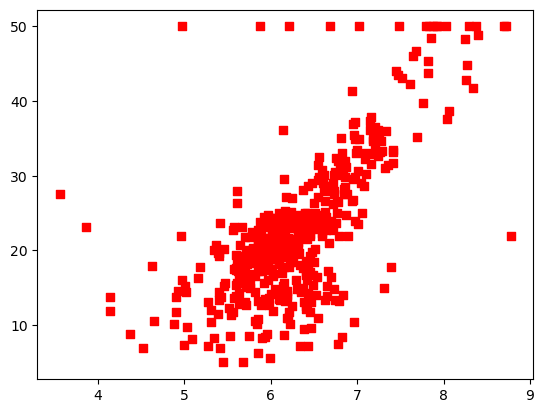

In [46]:
# Plotting the scatter plot
boston_X = data[:,5]
plt.scatter(boston_X, target, color='red', marker = 's')
plt.show()

<h2 id = "one4"> 1.4 线性回归及结果 </h2>

In [51]:
import random
from sklearn.metrics import mean_squared_error

train_ratio = 0.8
train_index = random.sample(range(boston_X.shape[0]),int(train_ratio * boston_X.shape[0]))
test_index = list(set(range(boston_X.shape[0])) - set(train_index))

boston_X_train = boston_X[train_index] 
boston_y_train = target[train_index] 
boston_X_test = boston_X[test_index]
boston_y_test = target[test_index]

LR = linear_model.LinearRegression()

boston_X_train = np.array(boston_X_train).reshape(-1,1)
print(boston_X_train.shape)
LR.fit(boston_X_train, boston_y_train)

# predict
boston_X_test = np.array(boston_X_test).reshape(-1,1)
boston_y_pred = LR.predict(boston_X_test)

print('Coefficients: ', LR.coef_)
# MSE
print("Mean squared error: %.2f"
      % mean_squared_error(boston_y_test, boston_y_pred))

(404, 1)
Coefficients:  [9.35904278]
Mean squared error: 42.13


#### 1.4.1 绘图

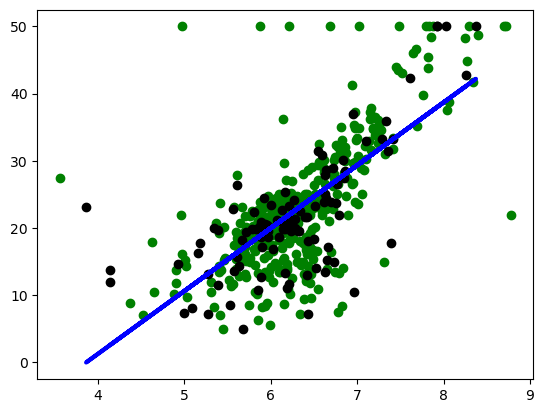

In [52]:
plt.plot(boston_X_test, boston_y_pred, color='blue', linewidth=3)
plt.scatter(boston_X_train, boston_y_train,  color='green')
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.show()

<h2 id = "one5"> 1.5 Boston思考题 </h2>

> `boston_X_train=np.array(boston_X_train).reshape(-1,1)`句的意义？

_将训练集变为`NumPy`中`array`类型，再将其转化成列向量输入，顺利带入计算式中。_

<h2 id = "one6"> 1.6 鸢尾花 </h2>

In [55]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [56]:
# Logistic Regression
LR = linear_model.LogisticRegression()
LR.fit(X, Y)

# meshgrid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

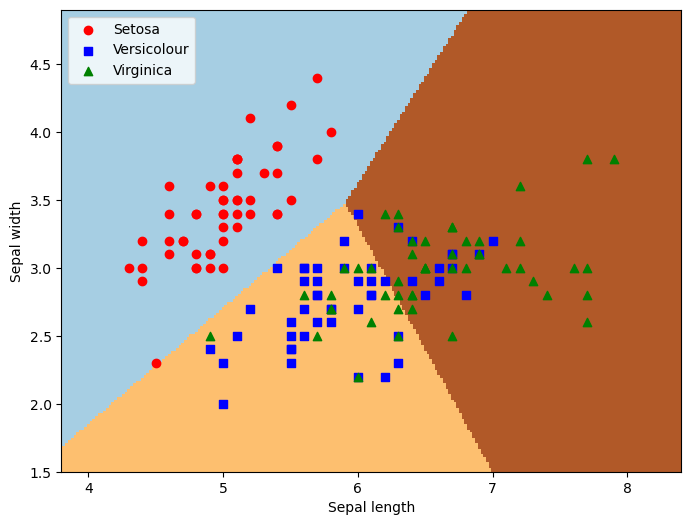

In [66]:
# pcolormesh
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# scatter plot
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker='s', label='Versicolour')
plt.scatter(X[100:, 0], X[100:, 1], color = 'green', marker='^', label='Virginica')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend(loc = 2)
plt.show()

<h2 id = "one7"> 1.7 逻辑回归系数 </h2>

In [68]:
print(LR.coef_) # coefficients

[[-2.70890249  2.32402378]
 [ 0.61273259 -1.57058803]
 [ 2.0961699  -0.75343574]]


<h2 id = "one8"> 1.8 K-means实现鸢尾花数据的聚类 </h2>

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


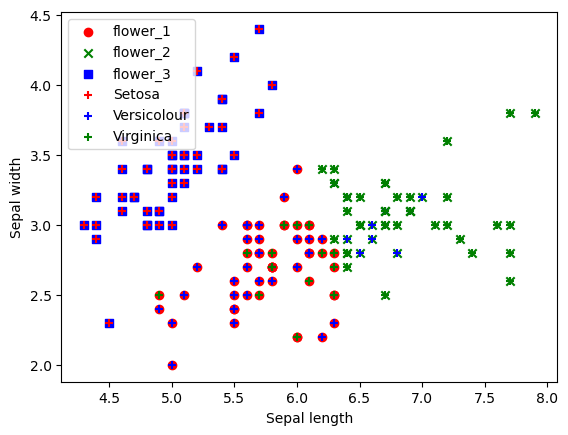

In [69]:
from sklearn.cluster import KMeans

X = iris.data[:, :2]  # we only take the first two features.
estimators = KMeans(n_clusters=3)
estimators.fit(X)
label_pred = estimators.labels_

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]

plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='flower_1')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='x', label='flower_2')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='s', label='flower_3')

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = '+', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker='+', label='Versicolour')
plt.scatter(X[100:, 0], X[100:, 1], color = 'green', marker='+', label='Virginica')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc = 2)
plt.show()

<h2 id = "two1"> 2.1 亚洲足球 </h2>

#### 2.1.1 亚洲足球数据

In [73]:
football_asia = {
    "feature_name": ["国家", "2019国际排名", "2018世界杯", "2015亚洲杯"],
    "country": ["中国", "伊拉克", "阿联酋", "乌兹别克斯坦", "约旦", "叙利亚", "印尼", "朝鲜",
                "巴林", "阿曼", "泰国", "科威特", "卡塔尔", "越南", "巴勒斯坦", "沙特", "伊朗",
                "澳洲", "韩国", "日本"],
    "2019World": [73, 91, 81, 88, 118, 76, 164, 110, 116, 87, 122, 160, 101, 102, 96, 67, 34, 40, 61, 60],
    "2018FIFA": [40, 40, 40, 40, 50, 40, 50, 50, 50, 50, 40, 50, 40, 50, 50, 26, 18, 30, 19, 15],
    "2015Asia": [7, 4, 6, 8, 9, 17, 17, 14, 11, 12, 17, 15, 13, 17, 16, 10, 6, 1, 2, 5]
}

#### 2.1.2 数据框架
> 数据维度不规范，reshape之后再作为DataFrame保存

In [93]:
feature_names = football_asia["feature_name"][1:]
countries = football_asia["country"]
world_rankings = football_asia["2019World"]
fifa_rankings = football_asia["2018FIFA"]
asia_cup_rankings = football_asia["2015Asia"]

data = {
    "2019World": world_rankings,
    "2018FIFA": fifa_rankings,
    "2015Asia": asia_cup_rankings
}

df = pd.DataFrame(data, index=countries)
# show DataFarme
print(df)


        2019World  2018FIFA  2015Asia
中国             73        40         7
伊拉克            91        40         4
阿联酋            81        40         6
乌兹别克斯坦         88        40         8
约旦            118        50         9
叙利亚            76        40        17
印尼            164        50        17
朝鲜            110        50        14
巴林            116        50        11
阿曼             87        50        12
泰国            122        40        17
科威特           160        50        15
卡塔尔           101        40        13
越南            102        50        17
巴勒斯坦           96        50        16
沙特             67        26        10
伊朗             34        18         6
澳洲             40        30         1
韩国             61        19         2
日本             60        15         5


#### 2.1.3 聚类

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


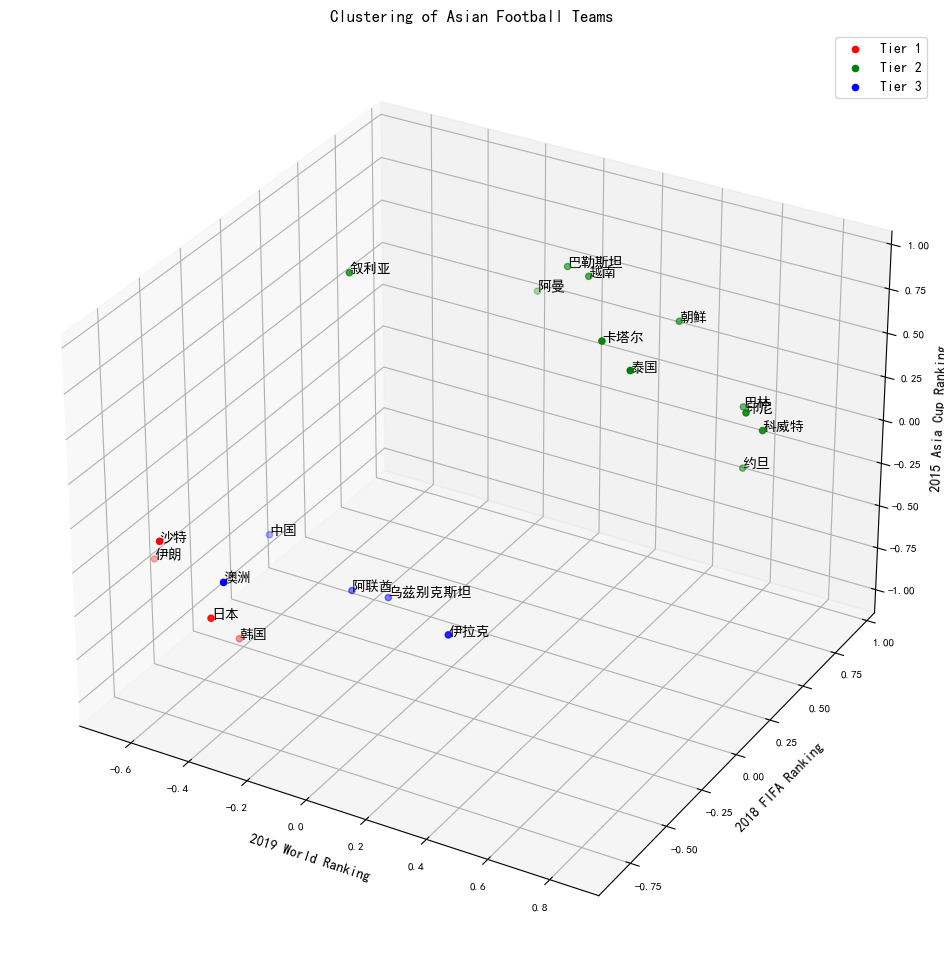

In [121]:
# Font
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# K-Means Funcion
def KMEANS(df, n_clusters=3):
    # features
    features = df[["2019World", "2018FIFA", "2015Asia"]]

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)

    df["Cluster"] = kmeans.labels_
    colors = ['r', 'g', 'b']

    # visualize
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')

    # scatter plot
    for cluster, color in zip(range(n_clusters), colors):
        cluster_data = df[df["Cluster"] == cluster]
        for x, y, z, name in zip(cluster_data["2019World"], cluster_data["2018FIFA"], cluster_data["2015Asia"], cluster_data.index):
            ax.text(x, y, z, name)
        ax.scatter(cluster_data["2019World"], cluster_data["2018FIFA"], cluster_data["2015Asia"], label=f'Tier {cluster + 1}', c=color)

    ax.set_xlabel('2019 World Ranking')
    ax.set_ylabel('2018 FIFA Ranking')
    ax.set_zlabel('2015 Asia Cup Ranking')
    ax.set_title('Clustering of Asian Football Teams')
    ax.legend()

    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='z', labelsize=8)

    plt.show()

# 使用示例
KMEANS(df, n_clusters=3)


<h2 id = "two2"> 2.2 亚洲足球 </h2>

#### 2.2.1 权重修改

In [122]:
# Weight
weight_2019 = 3.0 # 2019 World Ranking
weight_2018 = 2.0 # 2018 FIFA Ranking
weight_2015 = 1.0 # 2015 Asia Cup Ranking

# Weighted Features
df["2019World"] = df["2019World"] * weight_2019
df["2018FIFA"] = df["2018FIFA"] * weight_2018
df["2015Asia"] = df["2015Asia"] * weight_2015

#### 2.2.2 将权重更新后的DataFrame放入封装好的KMeans中

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


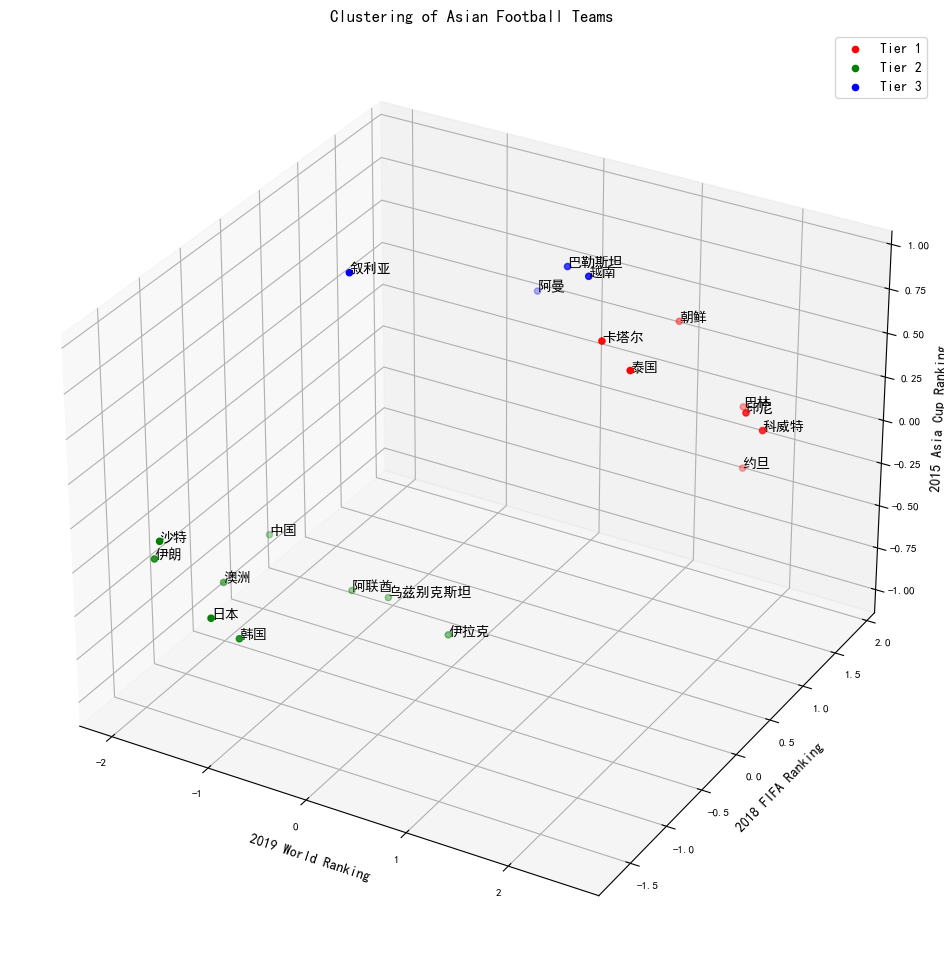

In [123]:
KMEANS(df, n_clusters=3)

#### 2.2.3 输出数据表格

In [113]:
print(df)

        2019World  2018FIFA  2015Asia  Cluster
中国         1314.0     160.0       7.0        0
伊拉克        1638.0     160.0       4.0        2
阿联酋        1458.0     160.0       6.0        0
乌兹别克斯坦     1584.0     160.0       8.0        2
约旦         2124.0     200.0       9.0        2
叙利亚        1368.0     160.0      17.0        0
印尼         2952.0     200.0      17.0        1
朝鲜         1980.0     200.0      14.0        2
巴林         2088.0     200.0      11.0        2
阿曼         1566.0     200.0      12.0        2
泰国         2196.0     160.0      17.0        2
科威特        2880.0     200.0      15.0        1
卡塔尔        1818.0     160.0      13.0        2
越南         1836.0     200.0      17.0        2
巴勒斯坦       1728.0     200.0      16.0        2
沙特         1206.0     104.0      10.0        0
伊朗          612.0      72.0       6.0        0
澳洲          720.0     120.0       1.0        0
韩国         1098.0      76.0       2.0        0
日本         1080.0      60.0       5.0        0


#### 2.2.4 权重分析

不同的权重会使聚类后数据偏向不同的聚类簇，也可以理解为不同聚类的含金量吧。\
比如世界杯八强和贵州村超八强的含金量哈哈哈。

#### 2.2.5 数据正则化/标准化

**标准化数据**

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


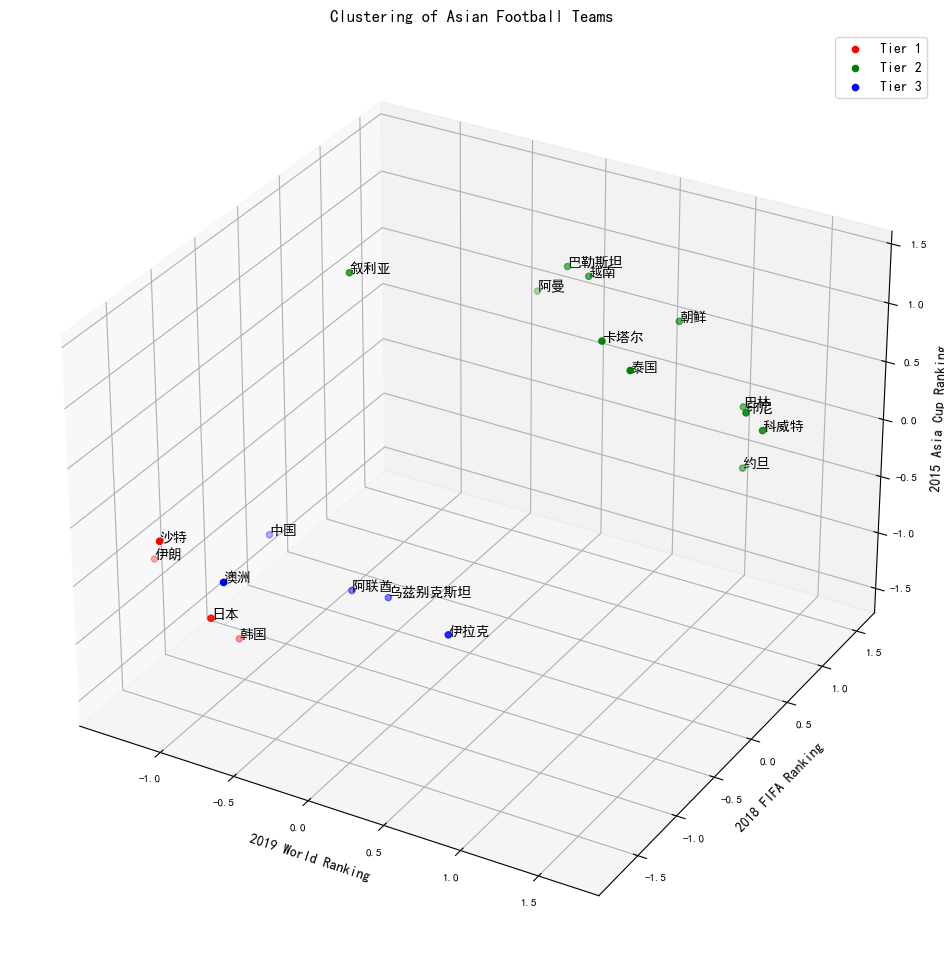

In [124]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
scaler.fit(df[["2019World", "2018FIFA", "2015Asia"]])
df[["2019World", "2018FIFA", "2015Asia"]] = scaler.transform(df[["2019World", "2018FIFA", "2015Asia"]])

KMEANS(df, n_clusters=3)

In [115]:
print(df)

        2019World  2018FIFA  2015Asia  Cluster
中国      -0.584268  0.052235 -0.646777        2
伊拉克     -0.040763  0.052235 -1.225981        2
阿联酋     -0.342710  0.052235 -0.839845        2
乌兹别克斯坦  -0.131347  0.052235 -0.453709        2
约旦       0.774494  0.922821 -0.260642        0
叙利亚     -0.493683  0.052235  1.283901        0
印尼       2.163451  0.922821  1.283901        0
朝鲜       0.532937  0.922821  0.704698        0
巴林       0.714105  0.922821  0.125494        0
阿曼      -0.161542  0.922821  0.318562        0
泰国       0.895273  0.052235  1.283901        0
科威特      2.042672  0.922821  0.897765        0
卡塔尔      0.261184  0.052235  0.511630        0
越南       0.291379  0.922821  1.283901        0
巴勒斯坦     0.110211  0.922821  1.090833        0
沙特      -0.765436 -1.166585 -0.067574        1
伊朗      -1.761861 -1.863054 -0.839845        1
澳洲      -1.580693 -0.818351 -1.805184        1
韩国      -0.946604 -1.775996 -1.612116        1
日本      -0.976799 -2.124230 -1.032913        1


**正则化处理**

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


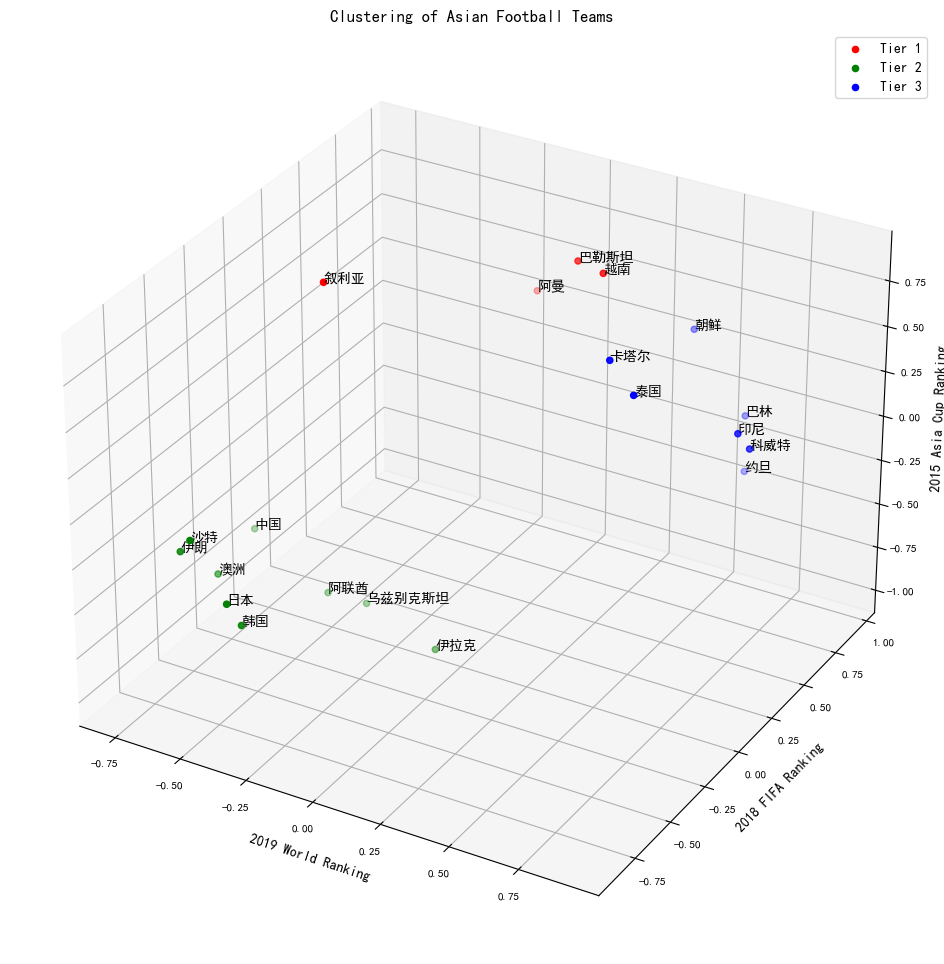

In [125]:
from sklearn.preprocessing import Normalizer

# Normalization
normalizer = Normalizer()
normalizer.fit(df[["2019World", "2018FIFA", "2015Asia"]])
df[["2019World", "2018FIFA", "2015Asia"]] = normalizer.transform(df[["2019World", "2018FIFA", "2015Asia"]])

KMEANS(df, n_clusters=3)

In [117]:
print(df)

        2019World  2018FIFA  2015Asia  Cluster
中国      -0.669137  0.059823 -0.740727        2
伊拉克     -0.033201  0.042545 -0.998543        2
阿联酋     -0.377193  0.057491 -0.924349        2
乌兹别克斯坦  -0.276393  0.109918 -0.954738        2
约旦       0.628327  0.748661 -0.211452        1
叙利亚     -0.358642  0.037947  0.932704        1
印尼       0.807363  0.344381  0.479130        1
朝鲜       0.417144  0.722318  0.551586        1
巴林       0.608483  0.786329  0.106933        1
阿曼      -0.163250  0.932582  0.321931        1
泰国       0.571661  0.033354  0.819812        1
科威特      0.845982  0.382191  0.371814        1
卡塔尔      0.452807  0.090559  0.886997        1
越南       0.181232  0.573978  0.798563        1
巴勒斯坦     0.076906  0.643951  0.761191        1
沙特      -0.547946 -0.835114 -0.048373        0
伊朗      -0.652968 -0.690472 -0.311257        0
澳洲      -0.623511 -0.322802 -0.712062        2
韩国      -0.367101 -0.688746 -0.625192        0
日本      -0.382151 -0.831059 -0.404105        0


#### 2.2.6 ~~结论:~~
<font color = "orange"> ~~中国妥妥的T3捏~~ </font>

<h2 id = "two3"> 2.3 Matplotlib使用、聚类数改变…… </h2>

#### 2.3.1 聚类数改变
~~看看中国队的下限在哪~~

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


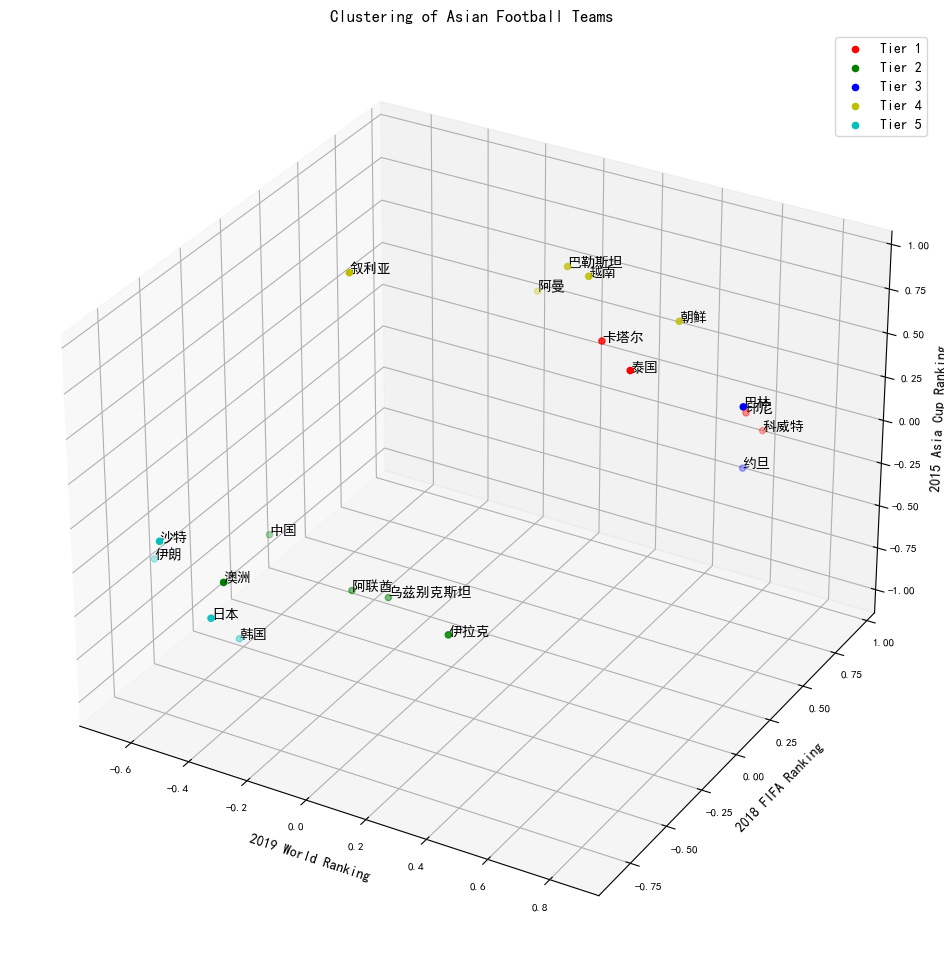

In [120]:
# K-Means Funcion
def KMEANS(df, n_clusters=5):
    # features
    features = df[["2019World", "2018FIFA", "2015Asia"]]

    # KMeans
    kmeans = KMeans(n_clusters = n_clusters, random_state=42)
    kmeans.fit(features)

    df["Cluster"] = kmeans.labels_
    colors = ['r', 'g', 'b', 'y', 'c']

    # visualize
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')

    # scatter plot
    for cluster, color in zip(range(n_clusters), colors):
        cluster_data = df[df["Cluster"] == cluster]
        for x, y, z, name in zip(cluster_data["2019World"], cluster_data["2018FIFA"], cluster_data["2015Asia"], cluster_data.index):
            ax.text(x, y, z, name)
        ax.scatter(cluster_data["2019World"], cluster_data["2018FIFA"], cluster_data["2015Asia"], label=f'Tier {cluster + 1}', c=color)

    ax.set_xlabel('2019 World Ranking')
    ax.set_ylabel('2018 FIFA Ranking')
    ax.set_zlabel('2015 Asia Cup Ranking')
    ax.set_title('Clustering of Asian Football Teams')
    ax.legend()

    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='z', labelsize=8)

    plt.show()

KMEANS(df, n_clusters=5)